In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [2]:
DATE_FMT = "%Y-%m-%d"
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

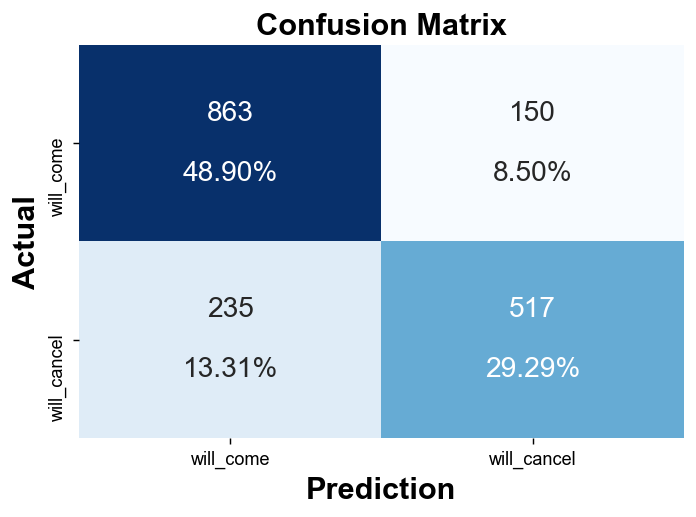

Optimal probability threshold (to maximize F-0.5): 0.67
F-0.5 Score: 0.756

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 31 models to obtain STLY statistics...

Pulling stats from STLY date 2016-08-02, stay_date 2016-08-02...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-03...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-04...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-05...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-06...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-07...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-08...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-09...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-10...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-11...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-12...
Pulling stats from STLY date 2016-08-02, stay_dat

In [3]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [4]:
h1_sim.head(15)

,DOW,RoomsOTB,RevOTB,CxlForecast,Trn_RoomsOTB,Trn_RevOTB,Trn_CxlForecast,TrnP_RoomsOTB,TrnP_RevOTB,TrnP_CxlForecast,Grp_RoomsOTB,Grp_RevOTB,Grp_CxlForecast,Cnt_RoomsOTB,Cnt_RevOTB,Cnt_CxlForecast,Date,TM05_Date,TM15_Date,TM30_Date,WeekEndDate,WE,WD,STLY_Date,Occ,RevPAR,RemSupply,ADR_OTB,Trn_ADR_OTB,TrnP_ADR_OTB,Grp_ADR_OTB,Cnt_ADR_OTB,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,Realized_Cxls,SellingPrice,TM05_RoomsOTB,TM05_ADR,TM05_TRN_OTB,TM05_TRN_ADR,TM05_TRNP_OTB,TM05_TRNP_ADR,TM05_GRP_OTB,TM05_GRP_ADR,TM05_CNT_OTB,TM05_CNT_ADR,TM15_RoomsOTB,TM15_ADR,TM15_TRN_OTB,TM15_TRN_ADR,TM15_TRNP_OTB,TM15_TRNP_ADR,TM15_GRP_OTB,TM15_GRP_ADR,TM15_CNT_OTB,TM15_CNT_ADR,TM30_RoomsOTB,TM30_ADR,TM30_TRN_OTB,TM30_TRN_ADR,TM30_TRNP_OTB,TM30_TRNP_ADR,TM30_GRP_OTB,TM30_GRP_ADR,TM30_CNT_OTB,TM30_CNT_ADR,STLY_RoomsOTB,STLY_ADR_OTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM15_ADR,STLY_TM15_RoomsOTB,STLY_TM05_ADR,STLY_TM30_RoomsOTB,STLY_TM30_ADR,STLY_Trn_RoomsOTB,STLY_Trn_ADR_OTB,STLY_TM05_TRN_OTB,STLY_TM05_TRN_ADR,STLY_TM15_TRN_OTB,STLY_TM15_TRN_ADR,STLY_TM30_TRN_OTB,STLY_TM30_TRN_ADR,STLY_TrnP_RoomsOTB,STLY_TrnP_ADR_OTB,STLY_TM05_TRNP_OTB,STLY_TM05_TRNP_ADR,STLY_TM15_TRNP_OTB,STLY_TM15_TRNP_ADR,STLY_TM30_TRNP_OTB,STLY_TM30_TRNP_ADR,STLY_Grp_RoomsOTB,STLY_Grp_ADR_OTB,STLY_TM05_GRP_OTB,STLY_TM05_GRP_ADR,STLY_TM15_GRP_OTB,STLY_TM15_GRP_ADR,STLY_TM30_GRP_OTB,STLY_TM30_GRP_ADR,STLY_Cnt_RoomsOTB,STLY_Cnt_ADR_OTB,STLY_TM05_CNT_OTB,STLY_TM05_CNT_ADR,STLY_TM15_CNT_OTB,STLY_TM15_CNT_ADR,STLY_TM30_CNT_OTB,STLY_TM30_CNT_ADR
2017-08-01,Tue,184.0,35239.14,18.0,151.0,29935.72,16.0,13.0,2488.24,2.0,2.0,291.66,0.0,18.0,2523.52,0.0,2017-08-01,2017-07-27,2017-07-17,2017-07-02,2017-08-06,False,False,2016-08-02,0.98,188.44,21,191.52,198.25,191.40,145.83,140.20,183.0,170.00,31110.89,166.37,81.0,134,204.00,177.0,192.05,144.0,199.23,13.0,191.40,2.0,145.83,18.0,140.20,180.0,191.78,147.0,198.75,13.0,191.40,2.0,145.83,18.0,140.20,170.0,188.18,139.0,195.88,11.0,177.17,2.0,145.83,18.0,140.20,183.0,170.00,185.03,182.0,167.36,180.0,168.12,180.0,166.00,159.0,175.03,158.0,172.89,156.0,172.07,156.0,170.50,14.0,152.47,14.0,152.47,14.0,152.47,14.0,152.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,114.72,10.0,114.72,10.0,114.72,10.0,114.72
2017-08-02,Wed,186.0,36141.47,19.0,152.0,30940.93,17.0,11.0,2004.24,2.0,2.0,291.66,0.0,21.0,2904.64,0.0,2017-08-02,2017-07-28,2017-07-18,2017-07-03,2017-08-06,False,False,2016-08-03,0.99,193.27,20,194.31,203.56,182.20,145.83,138.32,182.0,173.96,31660.62,169.31,86.0,131,206.75,183.0,193.75,149.0,203.06,11.0,182.20,2.0,145.83,21.0,138.32,183.0,192.39,149.0,201.39,11.0,182.20,2.0,145.83,21.0,138.32,174.0,187.86,143.0,196.84,9.0,162.76,2.0,145.83,20.0,139.16,182.0,173.96,185.03,173.0,172.51,176.0,172.87,179.0,170.49,159.0,178.23,151.0,177.65,154.0,177.14,157.0,174.75,14.0,154.47,14.0,154.47,14.0,154.47,14.0,154.47,1.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,114.89,8.0,114.89,8.0,114.89,8.0,114.89
2017-08-03,Thu,179.0,35705.54,17.0,140.0,29773.21,15.0,13.0,2225.28,2.0,3.0,453.06,0.0,23.0,3253.99,0.0,2017-08-03,2017-07-29,2017-07-19,2017-07-04,2017-08-06,False,False,2016-08-04,0.96,190.94,25,199.47,212.67,171.18,151.02,141.48,183.0,182.11,33326.17,178.21,96.0,140,210.33,184.0,200.31,145.0,213.27,13.0,171.18,3.0,151.02,23.0,141.48,181.0,198.69,144.0,211.53,11.0,163.20,3.0,151.02,23.0,141.48,170.0,194.54,135.0,206.31,11.0,163.20,2.0,145.83,22.0,142.39,183.0,182.11,185.03,177.0,179.67,177.0,180.40,173.0,177.01,153.0,185.74,149.0,184.72,149.0,183.85,145.0,180.79,20.0,186.56,18.0,179.47,18.0,179.47,18.0,179.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,117.73,10.0,117.73,10.0,117.73,10.0,117.73
2017-08-04,Fri,184.0,37156.71,19.0,147.0,31397.45,17.0,12.0,2191.21,2.0,3.0,453.06,0.0,22.0,3114.99,0.0,2017-08-04,2017-07-30,2017-07-20,2017-07-05,2017-08-06,True,False,2016-08-05,0.98,198.70,22,201.94,213.59,182.60,151.02,141.59,183.0,188.02,34408.31,184.00,106.0,150,211.06,180.0,203.40,143.0,215.76,12.0,182.60,3.0,151.02,22.0,141.59,179.0,200.79,142.0,212.55,12.0,18

In [ ]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [ ]:
h1_sim.to_pickle("pickle/h1_sim.pick")
h2_sim.to_pickle("pickle/h2_sim.pick")

In [ ]:
from model_cancellations import get_otb_res
import datetime
test = get_otb_res(h1_res,'2016-08-01')
mask = (test.ArrivalDate<='2016-08-05') & (test.CheckoutDate>'2016-08-05')
len(test[mask])

In [ ]:
h2_sim[['TM05_RoomsOTB', 'TM15_RoomsOTB', 'TM30_RoomsOTB']].head(15)

In [ ]:
h1_dbd.loc["2017-08-02"]

In [ ]:
h1_dbd.loc['2016-08-03']

In [ ]:
h1_res.columns

In [ ]:
h1_res.ReservationStatus.value_counts()

In [ ]:
h2_sim.head()

In [ ]:
h1_dbd.loc["2017-08-15", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

In [ ]:
h1_dbd.loc["2016-08-16", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]